<a href="https://colab.research.google.com/github/Kimeteor309/Financial-big-data-analysis/blob/main/week2%E4%BD%9C%E6%A5%AD_%E9%87%91%E8%9E%8D%E5%B8%82%E5%A0%B4%E6%A6%82%E8%BF%B0%E8%88%87%E8%B3%87%E6%96%99%E6%94%B6%E9%9B%86%E3%80%81%E9%A0%90%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 從證券交易所爬取股價資料，並進行可視化

                  成交股數            成交金額     開盤價     最高價     最低價     收盤價  \
日期                                                                       
2023-09-01  15,194,921   8,331,995,536  543.00  553.00  543.00  548.00   
2023-09-04   9,772,925   5,412,329,762  549.00  557.00  549.00  557.00   
2023-09-05  14,337,041   7,911,531,475  553.00  555.00  550.00  552.00   
2023-09-06  14,442,757   7,972,706,415  556.00  556.00  550.00  550.00   
2023-09-07  22,610,385  12,305,542,681  546.00  548.00  542.00  542.00   
2023-09-08  16,702,110   8,980,038,278  535.00  540.00  535.00  539.00   
2023-09-11  15,540,773   8,348,107,210  539.00  540.00  536.00  536.00   
2023-09-12  17,135,765   9,268,673,682  536.00  545.00  536.00  544.00   
2023-09-13  16,836,487   9,146,776,791  545.00  548.00  541.00  541.00   
2023-09-14  18,377,284  10,058,129,685  544.00  550.00  543.00  550.00   
2023-09-15  44,681,949  24,818,735,444  549.00  558.00  547.00  558.00   
2023-09-18  40,148,161  21,843,932,948

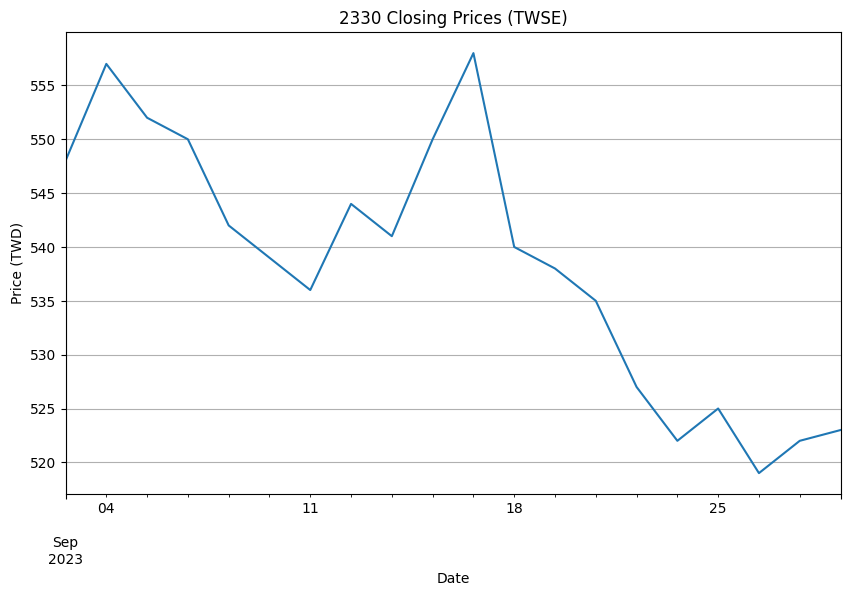

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國年轉換為西元年
def convert_to_gregorian(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉換為西元年
    return f'{year}/{month}/{day}'

# 從台灣證券交易所 API 獲取每日收盤價
def get_twse_data(stock_symbol, date):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_symbol}"
    response = requests.get(url)
    data = response.json()

    # 解析 JSON 並轉換為 DataFrame
    columns = data['fields']
    rows = data['data']
    df = pd.DataFrame(rows, columns=columns)

    # 將日期轉換為西元年
    df['日期'] = df['日期'].apply(convert_to_gregorian)
    df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')  # 指定西元年格式
    df.set_index('日期', inplace=True)
    print(df)
    return df

# 可視化台灣證券交易所的股價資料
def plot_twse_data(df, stock_symbol):
    df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''))  # 將收盤價轉換為數值
    df['收盤價'].plot(figsize=(10, 6))
    plt.title(f'{stock_symbol} Closing Prices (TWSE)')
    plt.ylabel('Price (TWD)')
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()

# 取得並顯示台灣證券交易所的股價資料
symbol = '2330'  # 台積電股票代號
date = '20230901'  # 2023年9月1日

df_twse = get_twse_data(symbol, date)
plot_twse_data(df_twse, symbol)


# 從Yahoo奇摩爬取股價資料，並進行可視化

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 爬取 Yahoo 奇摩股市台積電的股價資料
def get_stock_price_yahoo(symbol):
    url = f"https://tw.stock.yahoo.com/quote/{symbol}"
    response = requests.get(url)

    # 檢查是否成功取得頁面內容
    if response.status_code != 200:
        print(f"Failed to retrieve data for {symbol}")
        return None

    # 使用 BeautifulSoup 解析 HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # 初始化 label 和 value 陣列
    labels = []
    values = []

    # 找出所有的 'li' 元素
    items = soup.find_all('li', class_='price-detail-item')

    # 提取 "名稱" 和 "值"，並分別放入 labels 和 values 陣列
    for item in items:
        label = item.find('span', class_='C(#232a31)').text
        value = item.find('span', class_='Fw(600)').text
        labels.append(label)
        values.append(value)

    # 將資料放入 DataFrame
    df = pd.DataFrame({
        'Label': labels,
        'Value': values
    })

    # 顯示 DataFrame
    print(df)


symbol = "2330.TW"  # 台積電股票代號
get_stock_price_yahoo(symbol)

      Label   Value
0        成交     960
1        開盤     940
2        最高     960
3        最低     936
4        均價     949
5   成交金額(億)  310.27
6        昨收     941
7       漲跌幅   2.02%
8        漲跌   19.00
9        總量  32,674
10       昨量  28,394
11       振幅   2.55%
